In [8]:
import numpy as np
import matplotlib.pyplot as plt
import utils
from PIL import Image

In [9]:
n = 800
p = 500
profile = 'test'
profile_test = 'test'
tau = 0.05
alpha = 1
sig = 1

Lambda_min = 0.1
Lambda_max = 6
Lambda_nb_points = 20
Lambdas = np.linspace(Lambda_min, Lambda_max, Lambda_nb_points)


Gamma = utils.variance_profile(profile, n, p, tau = tau)
Gamma_test = utils.variance_profile(profile_test, 1, p, tau = tau)
rts = [utils.R_ts(l, Gamma, Gamma_test, n, p, alpha = alpha, sig = sig, mse = True, profile_test = profile_test, eps = 0) for l in Lambdas]
Risk = [x[0] for x in rts]
Equivalent_Risk = [x[1] for x in rts]
Risk_realisation = [x[2] for x in rts]

---------- n = 800 - p = 500 - lambda = 0.1 ----------
---------- n = 800 - p = 500 - lambda = 0.41052631578947374 ----------
---------- n = 800 - p = 500 - lambda = 0.7210526315789474 ----------
---------- n = 800 - p = 500 - lambda = 1.0315789473684212 ----------
---------- n = 800 - p = 500 - lambda = 1.342105263157895 ----------
---------- n = 800 - p = 500 - lambda = 1.6526315789473687 ----------
---------- n = 800 - p = 500 - lambda = 1.9631578947368422 ----------
---------- n = 800 - p = 500 - lambda = 2.273684210526316 ----------
---------- n = 800 - p = 500 - lambda = 2.5842105263157897 ----------
---------- n = 800 - p = 500 - lambda = 2.8947368421052633 ----------
---------- n = 800 - p = 500 - lambda = 3.2052631578947373 ----------
---------- n = 800 - p = 500 - lambda = 3.515789473684211 ----------
---------- n = 800 - p = 500 - lambda = 3.8263157894736843 ----------
---------- n = 800 - p = 500 - lambda = 4.136842105263158 ----------
---------- n = 800 - p = 500 - lambda 

Text(0.5, 0, 'lambda')

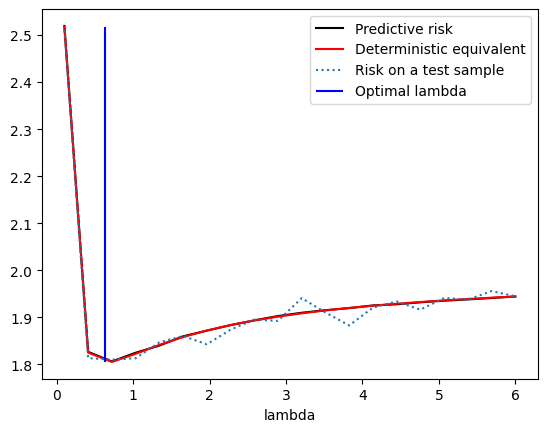

In [11]:
plt.plot(Lambdas, Risk, color = 'black')
plt.plot(Lambdas, Equivalent_Risk, color = 'red')
plt.plot(Lambdas, Risk_realisation,':')

plt.vlines(sig*sig*p/(alpha*alpha*n), np.min(rs1), np.max(rs1), color='blue')
plt.legend(["Predictive risk","Deterministic equivalent", "Risk on a test sample", "Optimal lambda"], loc = 'upper right')
plt.xlabel('lambda')

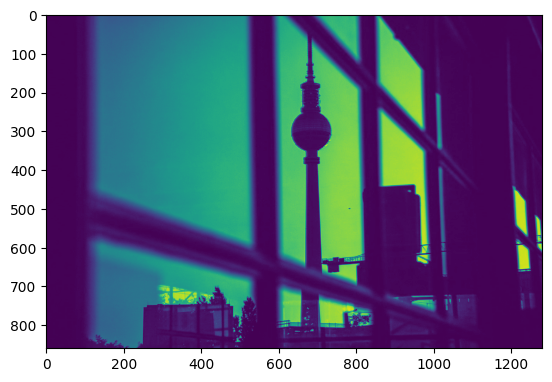

In [4]:
#Preprocessing of the Berlin photo
img = Image.open('berlin.jpg')
numpydata = np.asarray(img)
Gamma_img = numpydata[:,:,1]
plt.imshow(Gamma_img[:,:])

In [5]:
n = 800
p = 400


tau = 0.005
#tau = 10


alpha = 1
sig = 1

lam_min = 0.03
lam_max = 10
lam_nb_points = 80
lams = np.linspace(lam_min, lam_max, lam_nb_points)


Gamma_const = utils.variance_profile('constant', n, p, tau = tau)
Gamma_const_test = utils.variance_profile('constant', 1, p, tau = tau)
rts_const = [utils.R_ts(l, Gamma_const, Gamma_const_test, n, p, alpha = alpha, sig = sig) for l in lams]
rs0_const = [x[0] for x in rts_const]
rs1_const = [x[1] for x in rts_const]


Gamma_const_pw = utils.variance_profile('const_piecewise', n, p, tau = tau)
Gamma_const_pw_test = utils.variance_profile('const_piecewise', 1, p, tau = tau)
rts_const_pw  = [utils.R_ts(l, Gamma_const_pw, Gamma_const_pw_test, n, p, alpha = alpha, sig = sig) for l in lams]
rs0_const_pw  = [x[0] for x in rts_const_pw ]
rs1_const_pw  = [x[1] for x in rts_const_pw ]


Gamma_db_sto = utils.variance_profile('doubly_stochastic', n, p, tau = tau, K = 1000)
Gamma_db_sto_test = utils.variance_profile('doubly_stochastic', 1, p, tau = tau, K = 1000)
rts_db_sto = [utils.R_ts(l, Gamma_db_sto, Gamma_db_sto_test, n, p, alpha = alpha, sig = sig) for l in lams]
rs0_db_sto = [x[0] for x in rts_db_sto]
rs1_db_sto = [x[1] for x in rts_db_sto]


Gamma_poly = utils.variance_profile('test', n, p, param_exp = 10)
Gamma_poly_test = utils.variance_profile('test', 1, p, param_exp = 10)
rts_poly = [utils.R_ts(l, Gamma_poly, Gamma_poly_test, n, p, alpha = alpha, sig = sig) for l in lams]
rs0_poly = [x[0] for x in rts_poly]
rs1_poly = [x[1] for x in rts_poly]

Gamma_pw3 = utils.variance_profile('const_piecewise3', n, p, param_exp = 10)
Gamma_pw3_test = utils.variance_profile('const_piecewise3', 1, p, param_exp = 10)
rts_pw3 = [utils.R_ts(l, Gamma_pw3, Gamma_pw3_test, n, p, alpha = alpha, sig = sig) for l in lams]
rs0_pw3 = [x[0] for x in rts_pw3]
rs1_pw3 = [x[1] for x in rts_pw3]

Gamma_col = utils.variance_profile('alternate_column', n, p, param_exp = 10)
Gamma_col_test = utils.variance_profile('alternate_column', 1, p, param_exp = 10)
rts_col = [utils.R_ts(l, Gamma_col, Gamma_col_test, n, p, alpha = alpha, sig = sig) for l in lams]
rs0_col = [x[0] for x in rts_col]
rs1_col = [x[1] for x in rts_col]

img_resized = img.resize((p,n))
Gamma_image = np.asarray(img_resized)[:,:,1]
Gamma_image = (Gamma_image/(np.sum(np.abs(Gamma_image))))*p*n
rts_image = [utils.R_ts(l, Gamma_image, Gamma_image_test, n, p, alpha = alpha, sig = sig) for l in lams]
rs0_image = [x[0] for x in rts_poly]
rs1_image = [x[1] for x in rts_poly]

---------- n = 800 - p = 400 - lambda = 0.03 ----------
---------- n = 800 - p = 400 - lambda = 0.15620253164556963 ----------
---------- n = 800 - p = 400 - lambda = 0.28240506329113924 ----------
---------- n = 800 - p = 400 - lambda = 0.40860759493670895 ----------
---------- n = 800 - p = 400 - lambda = 0.5348101265822786 ----------
---------- n = 800 - p = 400 - lambda = 0.6610126582278482 ----------
---------- n = 800 - p = 400 - lambda = 0.7872151898734179 ----------
---------- n = 800 - p = 400 - lambda = 0.9134177215189875 ----------
---------- n = 800 - p = 400 - lambda = 1.039620253164557 ----------
---------- n = 800 - p = 400 - lambda = 1.1658227848101268 ----------
---------- n = 800 - p = 400 - lambda = 1.2920253164556963 ----------
---------- n = 800 - p = 400 - lambda = 1.418227848101266 ----------
---------- n = 800 - p = 400 - lambda = 1.5444303797468357 ----------
---------- n = 800 - p = 400 - lambda = 1.6706329113924052 ----------
---------- n = 800 - p = 400 - la

---------- n = 800 - p = 400 - lambda = 5.204303797468355 ----------
---------- n = 800 - p = 400 - lambda = 5.330506329113925 ----------
---------- n = 800 - p = 400 - lambda = 5.456708860759495 ----------
---------- n = 800 - p = 400 - lambda = 5.582911392405064 ----------
---------- n = 800 - p = 400 - lambda = 5.709113924050634 ----------
---------- n = 800 - p = 400 - lambda = 5.835316455696203 ----------
---------- n = 800 - p = 400 - lambda = 5.961518987341773 ----------
---------- n = 800 - p = 400 - lambda = 6.087721518987343 ----------
---------- n = 800 - p = 400 - lambda = 6.2139240506329125 ----------
---------- n = 800 - p = 400 - lambda = 6.340126582278482 ----------
---------- n = 800 - p = 400 - lambda = 6.4663291139240515 ----------
---------- n = 800 - p = 400 - lambda = 6.592531645569621 ----------
---------- n = 800 - p = 400 - lambda = 6.7187341772151905 ----------
---------- n = 800 - p = 400 - lambda = 6.84493670886076 ----------
---------- n = 800 - p = 400 - l

---------- n = 800 - p = 400 - lambda = 0.03 ----------
---------- n = 800 - p = 400 - lambda = 0.15620253164556963 ----------
---------- n = 800 - p = 400 - lambda = 0.28240506329113924 ----------
---------- n = 800 - p = 400 - lambda = 0.40860759493670895 ----------
---------- n = 800 - p = 400 - lambda = 0.5348101265822786 ----------
---------- n = 800 - p = 400 - lambda = 0.6610126582278482 ----------
---------- n = 800 - p = 400 - lambda = 0.7872151898734179 ----------
---------- n = 800 - p = 400 - lambda = 0.9134177215189875 ----------
---------- n = 800 - p = 400 - lambda = 1.039620253164557 ----------
---------- n = 800 - p = 400 - lambda = 1.1658227848101268 ----------
---------- n = 800 - p = 400 - lambda = 1.2920253164556963 ----------
---------- n = 800 - p = 400 - lambda = 1.418227848101266 ----------
---------- n = 800 - p = 400 - lambda = 1.5444303797468357 ----------
---------- n = 800 - p = 400 - lambda = 1.6706329113924052 ----------
---------- n = 800 - p = 400 - la

---------- n = 800 - p = 400 - lambda = 5.204303797468355 ----------
---------- n = 800 - p = 400 - lambda = 5.330506329113925 ----------
---------- n = 800 - p = 400 - lambda = 5.456708860759495 ----------
---------- n = 800 - p = 400 - lambda = 5.582911392405064 ----------
---------- n = 800 - p = 400 - lambda = 5.709113924050634 ----------
---------- n = 800 - p = 400 - lambda = 5.835316455696203 ----------
---------- n = 800 - p = 400 - lambda = 5.961518987341773 ----------
---------- n = 800 - p = 400 - lambda = 6.087721518987343 ----------
---------- n = 800 - p = 400 - lambda = 6.2139240506329125 ----------
---------- n = 800 - p = 400 - lambda = 6.340126582278482 ----------
---------- n = 800 - p = 400 - lambda = 6.4663291139240515 ----------
---------- n = 800 - p = 400 - lambda = 6.592531645569621 ----------
---------- n = 800 - p = 400 - lambda = 6.7187341772151905 ----------
---------- n = 800 - p = 400 - lambda = 6.84493670886076 ----------
---------- n = 800 - p = 400 - l

NameError: name 'Gamma_image_test' is not defined

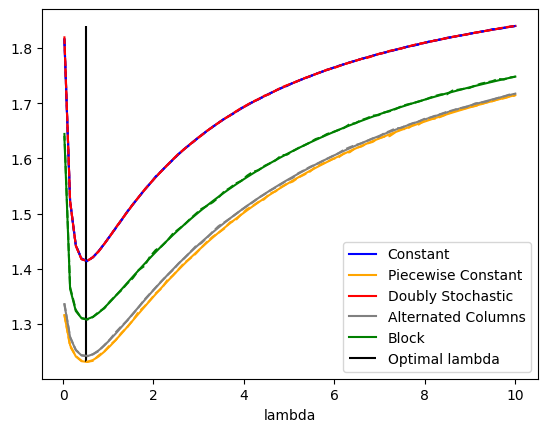

In [7]:
plt.plot(lams, rs1_const, color = 'blue')
plt.plot(lams, rs1_const_pw, color = 'orange')
plt.plot(lams, rs1_db_sto, color = 'red')
plt.plot(lams, rs1_col, color = 'grey')
plt.plot(lams, rs1_pw3, color = 'green')
plt.vlines(sig*sig*p/(alpha*alpha*n), np.min(rs0_const_pw), np.max(rs0_const), color = 'black')

plt.plot(lams, rs0_const, '--', color = 'blue')
plt.plot(lams, rs0_const_pw, '--', color = 'orange')
plt.plot(lams, rs0_db_sto, '--', color = 'red')
plt.plot(lams, rs0_col,'--', color = 'grey')
plt.plot(lams, rs0_pw3,'--', color = 'green')

#plt.plot(lams, rs0_image, color = 'purple')
plt.legend(["Constant","Piecewise Constant", "Doubly Stochastic","Alternated Columns", "Block", "Optimal lambda"])
plt.xlabel('lambda')